## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
import os
import keras

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = ((x / 255) - 0.5) * 2
    if flatten:
        x = x.reshape(len(x), -1)
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[128, 64, 32, 16, 12]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, unit in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=unit, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=unit, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [7]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer4 (Dense)        (None, 16)                528       
_________________________________________________________________
hidden_layer5 (Dense)        (None, 12)                204       
_________________________________________________________________
output (Dense)               (None, 10)                130 

In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [9]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [10]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 132us/step - loss: 1.8849 - accuracy: 0.3296 - val_loss: 1.6838 - val_accuracy: 0.4155
Epoch 2/100
50000/50000 [==============================] - 4s 87us/step - loss: 1.6100 - accuracy: 0.4334 - val_loss: 1.5709 - val_accuracy: 0.4503
Epoch 3/100
50000/50000 [==============================] - 5s 91us/step - loss: 1.5019 - accuracy: 0.4717 - val_loss: 1.5097 - val_accuracy: 0.4634
Epoch 4/100
50000/50000 [==============================] - 5s 109us/step - loss: 1.4194 - accuracy: 0.5009 - val_loss: 1.4680 - val_accuracy: 0.4824
Epoch 5/100
50000/50000 [==============================] - 5s 101us/step - loss: 1.3606 - accuracy: 0.5222 - val_loss: 1.4607 - val_accuracy: 0.4909
Epoch 6/100
50000/50000 [==============================] - 5s 93us/step - loss: 1.3051 - accuracy: 0.5400 - val_loss: 1.4783 - val_accuracy: 0.4776
Epoch 7/100
50000/50000 [==============================] - 

Epoch 56/100
50000/50000 [==============================] - 4s 90us/step - loss: 0.4171 - accuracy: 0.8517 - val_loss: 2.8900 - val_accuracy: 0.4819
Epoch 57/100
50000/50000 [==============================] - 5s 105us/step - loss: 0.4065 - accuracy: 0.8558 - val_loss: 2.9505 - val_accuracy: 0.4789
Epoch 58/100
50000/50000 [==============================] - 5s 97us/step - loss: 0.4090 - accuracy: 0.8548 - val_loss: 2.8574 - val_accuracy: 0.4803
Epoch 59/100
50000/50000 [==============================] - 5s 98us/step - loss: 0.4004 - accuracy: 0.8590 - val_loss: 2.9925 - val_accuracy: 0.4859
Epoch 60/100
50000/50000 [==============================] - 7s 133us/step - loss: 0.4021 - accuracy: 0.8576 - val_loss: 2.9464 - val_accuracy: 0.4749
Epoch 61/100
50000/50000 [==============================] - 5s 98us/step - loss: 0.3945 - accuracy: 0.8587 - val_loss: 3.0675 - val_accuracy: 0.4733
Epoch 62/100
50000/50000 [==============================] - 5s 91us/step - loss: 0.3879 - accuracy: 0.86

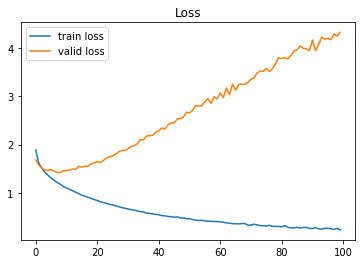

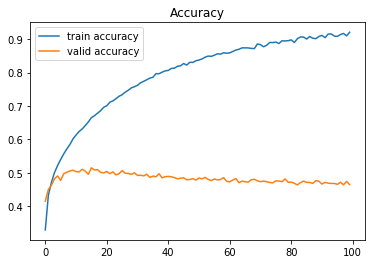

In [12]:
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()